# Deaths and Births

In [1]:
# dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pynsee.macrodata import get_dataset_list, get_series_list, get_series

In [2]:
import logging
import sys
logging.basicConfig(stream=sys.stdout,
                    level=logging.INFO, 
                    format="%(message)s")

In [3]:
# Feature engineering
insee_data = get_dataset_list()

df_idbank = get_series_list("DECES-MORTALITE", "NAISSANCES-FECONDITE")

df_idbank = df_idbank.loc[(df_idbank.FREQ == "M") & # monthly
                          (df_idbank.REF_AREA == "FM") & # metropolitan France
                          (df_idbank.DEMOGRAPHIE.isin(["NAISS","DECES"]))] 

# get data
data = get_series(df_idbank.IDBANK)

Getting datasets list: 100%|██████████| 227/227 [00:00<00:00, 1891.00it/s]

Data saved:
/home/onyxia/.cache/pynsee/pynsee/48719b3a81bc306982ce59585ceb295f.parquet


Macrodata series update, file used:
https://www.insee.fr/fr/statistiques/fichier/2862759/202412_correspondance_idbank_dimension.zip
Data saved:
/home/onyxia/.cache/pynsee/pynsee/a40cf62baf86bf9c0c9248cef61926f6.parquet


Metadata download:   3%|▎         | 6/226 [00:05<02:56,  1.24it/s]

API query number limit reached - function might be slowed down


Metadata download: 100%|██████████| 226/226 [13:25<00:00,  3.56s/it]


Data saved:
/home/onyxia/.cache/pynsee/pynsee/656b91cfbc8fc7c2afdcae7eb66f2707.parquet
Data saved:
/home/onyxia/.cache/pynsee/pynsee/34bab2db6751609d05892f59428157de.parquet


In [4]:
data['period'] = pd.cut(
  pd.to_datetime(data['DATE']),
  bins = pd.to_datetime(
    ['1946-01-01', '1975-01-01', '2000-01-01', pd.Timestamp.today().normalize()]),
  labels = ['1946-1975','1975-2000','2000-today']
    )

conditions = [data.IDBANK=="000436391", data.IDBANK=="000436394"]
values_label = ["Births", "Deaths"]
values_color = ["red", "blue"]
data['label'] = np.select(conditions, values_label)
data['color'] = np.select(conditions, values_color)

/tmp/ipykernel_4968/2457606856.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (period, group), ax in zip(data.groupby('period'), axes.flatten()):


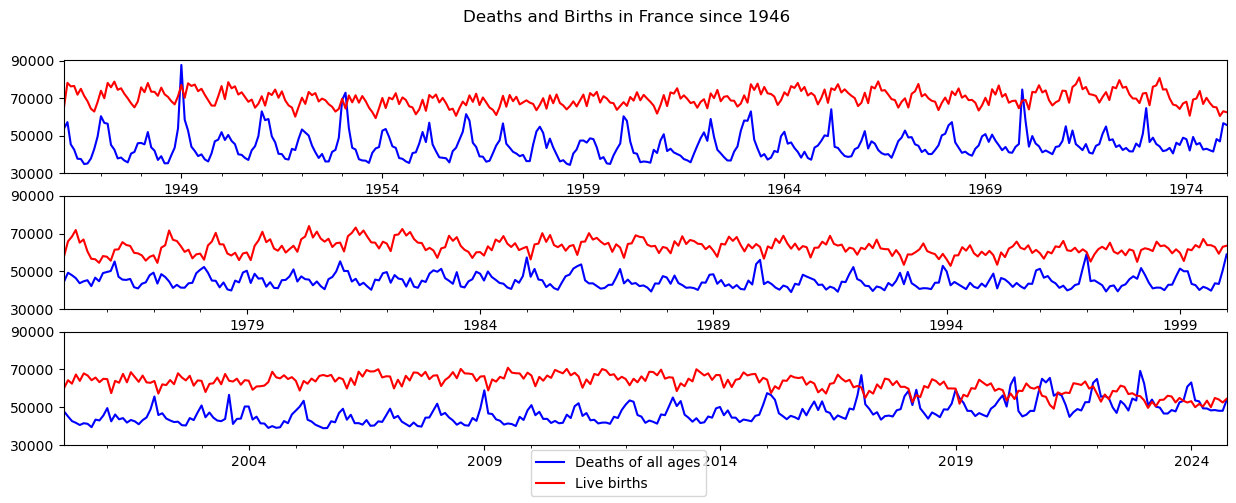

In [5]:
fig, axes = plt.subplots(3,1, figsize=(15,5))
plt.suptitle("Deaths and Births in France since 1946")
for (period, group), ax in zip(data.groupby('period'), axes.flatten()):
    for (var, group2) in group.groupby(['color', 'DEMOGRAPHIE_label_en']):
        group2.plot(x='DATE', y='OBS_VALUE',
                       kind='line', ax=ax,
                        color = var[0], label = var[1],
                        legend=False).xaxis.label.set_visible(False)
        
        ax.set_yticks(list(range(30000,100000,20000)))
  
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center')
plt.show()